# Melakukan import package

Package digunakan untuk membantu dalam proses development. Terdapat 6 package yang digunakan dalam notebook ini yaitu pandas, pylab, numpy, scipy, scikit-learn dan matplotlib. Berikut merupakan tujuan penggunaannya masing-masing:

1. pandas untuk data analisis
2. pylab untuk melakukan plotting
3. numpy untuk numerical computing
4. scipy untuk perhitungan matematika
5. scikit-learn atau sklearn untuk machine learning 
6. matplotlib untuk visualisasi data

In [911]:
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Melakukan Read File

Pada package pandas menyediakan beberapa fungsi untuk dapat melakukan pembacaan file dengan menyesuaikan tipe file yang akan dibaca. Dikarenakan file yang dibaca adalah bertipe CSV, maka dapat menggunakan fungsi read_csv untuk melakukan pembacaan file. Parameter yang dimasukan kedalam fungsi tersebut adalah path direktori dari file tersebut dengan diikuti ekstensi file nya.

File yang sudah dibaca, oleh pandas akan diubah menjadi dataframe. Singkatnya dataframe merupakan struktur data 2 dimensi yang terdiri dari row dan column yang bersifat fleksibel (dapat dimodifikasi)

In [912]:
cell_df = pd.read_csv("cell_samples.csv")

# Menampilkan Data

Setelah melakukan pembacaan file dan mengubah file tersebut menjadi dataframe, maka selanjutnya adalah menampilkan data nya. Tujuan dari menampilkan data adalah untuk mengetahui data yang akan dianalisis itu seperti apa.

Untuk dapat menampilkan data maka dapat menggunakan fungsi head. Fungsi head berfungsi untuk menampilkan 5 baris data pertama,  dengan catatan apabila tidak memasukan secara spesifik baris data yang ingin ditampilkan.

In [913]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Menampilkan Diagram Data

## Label Malignant

Untuk menampilkan diagram data sebelumnya perlu memilih terlebih dahulu data mana yang akan dibuatkan diagramnya. Untuk melakukan pemilihan data dapat melakukan pemilihan baris atau kolom tertentu pada dataframe. Pemilihan tersebut dapat menggunakan square bracket.

```python
cell_df[cell_df['Class'] == 4]
```
Kode tersebut berfungsi untuk mengembalikan semua baris data pada dataframe yang memiliki kolom Class bernilai 4 (malignan/tumor ganas)

```python
cell_df[cell_df['Class'] == 4][0:50]
```
Kode selanjutnya yaitu menentukan banyak baris yang ingin dikembalikan, dalam hal ini 50 baris saja yang akan dikembalikan

Setelah melakukan pemilihan tersebut, selanjutnya adalah membuat diagram data menggunakan fungsi plot pada dataframe.

```python
plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
```
Pada kode tersebut, diagram yang digunakan bertipe scatter dengan label di sumbu x yaitu Clump, dan di sumbu y yaitu UnifSize, dengan warna data point nya berwarna biru serta berlabel malignant

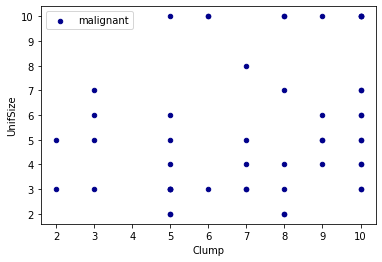

In [914]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');

Melihat apakah diagram sudah sesuai atau tidak

In [915]:
ax

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

In [916]:
ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);

In [917]:
ay

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

## Label Benign

Mirip seperti sebelumnya, akan tetapi terdapat sedikit perbedaan 

```python
cell_df[cell_df['Class'] == 2]
```
Perbedaan pertama yaitu baris data pada dataframe yang dipilih adalah yang memiliki kolom Class bernilai 2 (benign)

```python
plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign')
```
Lalu perbedaan kedua adalah parameter warna dan label yang masing bernilai kuning dan benign

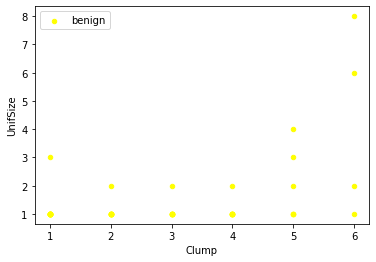

In [918]:
ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign');

# Melakukan Cek Tipe Data Tiap Kolom

Dari 11 kolom yang ada, 10 diantaranya memiliki tipe data numerik atau lebih tepatnya bilangan bulat (int64). Akan tetapi terdapat 1 kolom yang tipe datanya adalah nominal (object). Jika dilihat menggunakan fungsi head sebelumnya, kolom tersebut memiliki data numerik akan tetapi dibaca oleh pandas bukan numerik.

In [919]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

# Mengubah Tipe Data

Untuk melakukan penyeragaman tipe data, maka perlu mengubah tipe data yang bermasalah tersebut. Yang sebelumnya bertipe nominal (object) menjadi numerik (int32)

In [920]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Menentukan Feature  

Dalam membuat sebuah model klasifikasi, diperlukan pemilihan feature untuk untuk tahapan pembuatan modelnya. Dari 11 feature yang ada, 2 diantaranya yaitu ID dan Class tidak dipilih. Dikarenakan ID bukan feature yang dapat menentukan Class, dan Class sendiri merupakan output target atau hal yang ingin dilakukan prediksi. 

```python
cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
```
Kode tersebut mengembalikan baris data sesuai dengan 9 feature yang sudah dipilih sebelumnya

```python
X = np.asarray(feature_df)
```
Setelah didapatkan baris data dengan 9 feature tersebut, selanjutnya adalah merubahnya menjadi array dengan menggunakan numpy dan menyimpannya kedalam variabel X. Variabel X merupakan baris data dengan feature yang telah dipilih sebelumnya.

In [921]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

# Menentukan Output Target

Output target merupakah hal yang ingin diprediksi, dalam hal ini adalah menentukan apakah pasien tersebut masuk kedalam pasien yang memiliki tumor ganas (malignant) atau tumor jinak (benign). Output target dalam kasus ini adalah kolom Class.

```python
cell_df['Class'] = cell_df['Class'].astype('int')
```
Kode tersebut memastikan bahwa tipe data dari output target adalah numerik

```python
y = np.asarray(cell_df['Class'])
```
Baris data output target diubah menjadi array dan disimpan di variabel y. Maka dari itu variabel y merupakan variabel yang menyimpan baris data dari output target.

In [922]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

# Membentuk Bagian Training dan Testing Model

Untuk dapat membuat model klasifikasi ML diperlukan pembagian data untuk proses training dan proses testing. Proses training merupakan proses untuk membentuk model tersebut dengan menggunakan data training. Proses testing merupakan proses untuk mengetes bagaimana performa dari model tersebut ketika diberikan data yang sebelumnya belum pernah dilihat pada proses training, yaitu dengan menggunakan data testing.

```python
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.21, random_state=4)
```
X_train dan y_train akan digunakan untuk proses training, lalu untuk X_test digunakan sebagai data testing untuk prediksi. Hasil prediksi tersebut akan dibandingkan dengan y_test. Pembagian datanya yaitu untuk data testing sebesar 21% dari jumlah data yang ada.

In [923]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.21, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (539, 9) (539,)
Test set: (144, 9) (144,)


# Import SVM

Untuk dapat menggunakan algoritma SVM perlu melakukan import svm pada package sklearn terlebih dahulu. 

```python
clf = svm.SVC(kernel='rbf')
```
Dalam membuat model SVM nya, salah satu parameter yang dapat dimasukan adalah kernel. By default kernel yang digunakan adalah rbf

In [924]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')

# Training Model

Merupakan proses training model klasifikasi menggunakan svm. Dalam proses training diperlukan data training yaitu X_train dan y_train

In [925]:
clf.fit(X_train, y_train) 

SVC()

# Melakukan Prediksi

Setelah melakukan proses training, selanjutnya adalah melakukan prediksi. Untuk melakukan prediksi perlu menggunakan data testing, data testing yang digunakan adalah X_test. Hasil dari prediksi tersebut selanjutnya akan disimpan didalam variabel yhat 

In [926]:
yhat = clf.predict(X_test)

Menampilkan 5 data pertama dari hasil prediksi

In [927]:
yhat[0:5]

array([2, 4, 2, 4, 2])

# Mengevaluasi Hasil Model

Evaluasi hasil model diperlukan untuk mengetahui seberapa baik model yang telah dibuat. Secara sederhana hasil prediksi akan dibandingkan dengan hasil klasifikasi yang sesungguhnya. Maka dalam hal ini adalah variabel yhat akan dibandingkan dengan variabel y_test.

Membuat fungsi untuk menampilkan diagram confussion matrix

In [928]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Melakukan import matriks evaluasi yaitu confusion matrix dan classification report

In [929]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


Membuat confusion matrix dengan membandingkan variabel yhat dengan y_test

In [930]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])

In [931]:
np.set_printoptions(precision=2)

## Melihat Report Klasifikasi

Terdapat 3 matriks yang ada yaitu precision, recall dan f1-score. Secara sederhana semakin tinggi nilai dari ketiga matriks tersebut, maka semakin baik juga hasil klasifikasinya.

Dari report dibawah, dapat diketahui bahwa akurasi kumulatif yang didapatkan oleh model klasifikasinya yaitu bernilai 0.97. Dalam hal ini maka model klasifikasi yang telah dibuat memiliki hasil yang sangat memuaskan.

Terakhir dapat diketahui juga bahwa untuk pembagian data testing masing-masing yaitu untuk label 2 (benign) berjumlah 94 data dan untuk label 4 (malignant) berjumlah 50 data. Jika dijumlahkan maka akan sesuai dengan pembagian data sebelumnya yaitu untuk data testing berjumlah 144 data. 

In [932]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.95      0.97        94
           4       0.91      1.00      0.95        50

    accuracy                           0.97       144
   macro avg       0.95      0.97      0.96       144
weighted avg       0.97      0.97      0.97       144



In [933]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Melihat Confusion Matrix

Confusion matrix merupakan alat ukur untuk mengukur performa dari model klasifikasi yang mana output targetnya berupa 2 label atau lebih. Dalam kasus ini terdapat 2 label yang diprediksi yaitu Benign dan Malignant. Cara kerja confusion matrix yaitu menghitung berapa nilai yang True Positive (TP), False Positive (FP), False Negative (FN) dan True Negative (TN).

Hasilnya adalah untuk label prediksi malignant terklasifikasi benar ada 50 dan yg salah ada 5. Maksud klasifikasi yang salah dalam hal ini adalah terprediksi malignant akan tetapi aslinya adalah benign dengan jumlah yaitu 5.

Sedangkan untuk label benign terkalsifikasi benar ada 89 dan tidak ada yg salah.

Confusion matrix, without normalization
[[89  5]
 [ 0 50]]


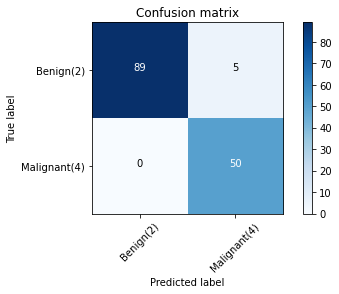

In [934]:
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Hasil f1-score

In [935]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9656301500563796

Hasil jacard score

In [936]:
## awalnya pakai ini tapi ternyata versi lama
# from sklearn.metrics import jaccard_similarity_score
# jaccard_similarity_score(y_test, yhat)

## sekarang pakai ini
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=4)

0.9090909090909091